# Computational Social Science Project #2 

**Enter your Name:**Kritika Chopra

*Semester:* Fall 2024


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [59]:
#
# import libraries you might need here 
#-----------
!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

# use random seed for consistent results 
np.random.seed(273)

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------ --------------------------- 3.1/9.8 MB 16.8 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.8 MB 17.5 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 15.3 MB/s eta 0:00:00


#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [8]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv("C:\\Users\\chopr\\Downloads\\Diabetes with Population Info by County 2017.csv", 
                       dtype={"CountyFIPS": str}) 

In [9]:
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,01003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,01005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,01007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,01009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [10]:
diabetes.tail()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
3215,Sweetwater County,Wyoming,56037,2560,9362,7518,92.0,44117,43226,891,...,30491,6159,4721,32308,16800,15508,108.3,4721,2262,2459
3216,Teton County,Wyoming,56039,439,2051,2005,94.8,23059,22875,184,...,18169,3843,3135,18625,9619,9006,106.8,3135,1526,1609
3217,Uinta County,Wyoming,56041,1440,4925,3519,97.6,20609,19891,718,...,13939,3251,2498,14538,7280,7258,100.3,2498,1234,1264
3218,Washakie County,Wyoming,56043,637,1738,1708,89.0,8129,7791,338,...,5951,2041,1686,6187,3142,3045,103.2,1686,794,892
3219,Weston County,Wyoming,56045,601,2015,1383,90.6,7100,6956,144,...,5434,1770,1340,5595,2923,2672,109.4,1340,637,703


In [11]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 

shape:  (3220, 95)


In [12]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [13]:
# List of columns we expect to be numeric
numeric_columns = ['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']

# Check for non-numeric values in these columns
for col in numeric_columns:
    # Check non-numeric values by filtering out numeric ones
    non_numeric_values = diabetes[col][~diabetes[col].str.isnumeric()].unique()
    print(f"Non-numeric values in column {col}: {non_numeric_values}")

Non-numeric values in column Diabetes_Number: ['Suppressed']
Non-numeric values in column Obesity_Number: ['No Data']
Non-numeric values in column Physical_Inactivity_Number: ['No Data']


In [14]:
#
# Although I have done it all together above I did this individual one to double-check that I did not miss anything.
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes['Diabetes_Number'].str.isnumeric()]['Diabetes_Number'].unique()) 

['Suppressed']


#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [15]:
#
# Recode variables
#-----------

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype(int) 

# Obesity
# ----------


# Physical Inactivity
# ----------
# Convert Obesity_Number to numeric type if needed. Use errors='coerce' if needed to handle non-numeric values.
#diabetes['Obesity_Number'] = pd.to_numeric(diabetes['Obesity_Number'], errors='coerce')
diabetes['Obesity_Number'] = pd.to_numeric(diabetes['Obesity_Number'], errors='coerce')
diabetes['Physical_Inactivity_Number'] = pd.to_numeric(diabetes['Physical_Inactivity_Number'], errors='coerce')

diabetes = diabetes.dropna(subset=['Obesity_Number', 'Physical_Inactivity_Number'])
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype(int)
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype(int)
print(diabetes[['Diabetes_Number', 'Obesity_Number', 'Physical_Inactivity_Number']].dtypes)


Diabetes_Number               int64
Obesity_Number                int64
Physical_Inactivity_Number    int64
dtype: object


In [16]:
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,01003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,01005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,01007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,01009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


In [17]:
# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype(float)

In [18]:
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,5178,13489,12525,76.5,55200,54170,1030,...,39614,9403,8050,41831,20054,21777,92.1,8050,3488,4562
1,Baldwin County,Alabama,01003,16707,48542,40024,86.6,208107,204535,3572,...,155502,49811,40665,162430,78104,84326,92.6,40665,18870,21795
2,Barbour County,Alabama,01005,3400,8009,5431,76.2,25782,25429,353,...,19394,5658,4634,20346,10923,9423,115.9,4634,2004,2630
3,Bibb County,Alabama,01007,2371,6534,5827,80.5,22527,22340,187,...,16864,4323,3661,17868,9578,8290,115.5,3661,1633,2028
4,Blount County,Alabama,01009,6282,14227,14365,79.7,57645,56710,935,...,42232,12400,10233,44177,21595,22582,95.6,10233,4540,5693


We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [19]:
#
# Select count variables to rescale to percentages (excluding ratios and total population columns)
exclude_columns = [
    'County', 'State', 'CountyFIPS', 
    'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
    'sex and age_total population_sex ratio (males per 100 females)', 
    'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
    'race_total population'
]

# Identify all columns that are not in the exclusion list for scaling
rc_cols = [col for col in diabetes.columns if col not in exclude_columns]

# Recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce')

# Divide all columns by the total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

In [20]:
diabetes.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,...,sex and age_total population_21 years and over,sex and age_total population_62 years and over,sex and age_total population_65 years and over,sex and age_total population_18 years and over_1,sex and age_total population_18 years and over_male,sex and age_total population_18 years and over_female,sex and age_total population_18 years and over_sex ratio (males per 100 females),sex and age_total population_65 years and over_1,sex and age_total population_65 years and over_male,sex and age_total population_65 years and over_female
0,Autauga County,Alabama,01001,0.093804,0.244366,0.226902,76.5,55200,0.981341,0.018659,...,0.717645,0.170344,0.145833,0.757808,0.363297,0.394511,92.1,0.145833,0.063188,0.082645
1,Baldwin County,Alabama,01003,0.080281,0.233255,0.192324,86.6,208107,0.982836,0.017164,...,0.747221,0.239353,0.195404,0.780512,0.375307,0.405205,92.6,0.195404,0.090675,0.104730
2,Barbour County,Alabama,01005,0.131875,0.310643,0.210651,76.2,25782,0.986308,0.013692,...,0.752230,0.219455,0.179738,0.789155,0.423668,0.365488,115.9,0.179738,0.077729,0.102009
3,Bibb County,Alabama,01007,0.105251,0.290052,0.258667,80.5,22527,0.991699,0.008301,...,0.748613,0.191903,0.162516,0.793182,0.425179,0.368003,115.5,0.162516,0.072491,0.090025
4,Blount County,Alabama,01009,0.108977,0.246804,0.249198,79.7,57645,0.983780,0.016220,...,0.732622,0.215110,0.177518,0.766363,0.374621,0.391743,95.6,0.177518,0.078758,0.098760


In [21]:
print('shape: ', diabetes.shape) 

shape:  (3112, 95)


Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [22]:
#
# check
#-----------
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)

# Generate summary statistics for the recoded columns (transposed)
diabetes_summary = diabetes.describe().transpose()

# Check recoding by displaying specific summary columns: count, mean, min, max
with pd.option_context('display.max_rows', 100, 'display.max_columns', None):
    # Display the columns: count, mean, min (index 3), and max (index 7)
    display(diabetes_summary.iloc[:, [0, 1, 3, 7]])

,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,0.090215,0.000000,8.741228e-01


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [23]:
#
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
# Function to get a list of duplicate columns
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index
            otherCol = df.iloc[:, y]
            # Check if two columns at x and y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

# Call the function and check for duplicate columns
duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames


Duplicate Columns are as follows: 


['hispanic or latino and race_total population',
 'sex and age_total population_65 years and over_1',
 'sex and age_total population',
 'sex and age_total population_18 years and over_1',
 'race_total population_two or more races_1',
 'race_total population_one race_1']

In [24]:
#
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns=duplicateColumnNames) 

In [25]:
print('shape: ', diabetes.shape) 

shape:  (3112, 89)


Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [26]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

In [27]:
print(diabetes.columns)

Index(['County', 'State', 'CountyFIPS', 'Diabetes_Number', 'Obesity_Number',
       'Physical_Inactivity_Number',
       'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
       'race_total population', 'race_total population_one race',
       'race_total population_two or more races',
       'race_total population_one race_white',
       'race_total population_one race_black or african american',
       'race_total population_one race_american indian and alaska native',
       'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
       'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
       'race_total population_one race_american indian and alaska native_navajo tribal grouping',
       'race_total population_one race_american indian and alaska native_sioux tribal grouping',
       'race_total population_one race_asian',
       'race_total population_one race_asian_asi

In [28]:
# Identify the total population column (e.g., 'race_total population')
total_population_col = 'race_total population'  # Adjust this if another column represents total population

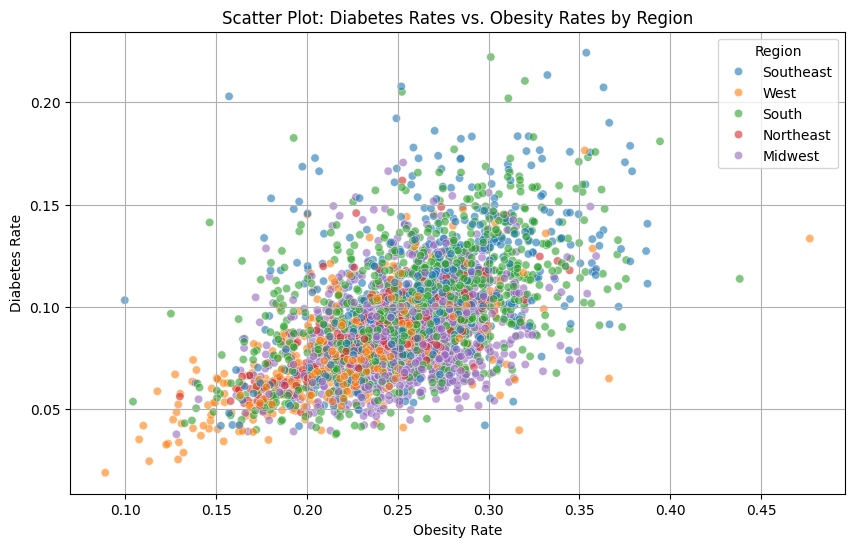

In [29]:
#
# EDA #1 and interpretations in this section 
#-----------
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots display within the notebook
%matplotlib inline

# Figure 1: Scatter plot of Diabetes vs. Obesity rates by region
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Obesity_Number', y='Diabetes_Number', hue='Region', data=diabetes, alpha=0.6)
plt.title('Scatter Plot: Diabetes Rates vs. Obesity Rates by Region')
plt.xlabel('Obesity Rate')
plt.ylabel('Diabetes Rate')
plt.grid(True)
plt.show()

There is a positive correlation between Diabetes Rate and Obesity Rate in all the regions.

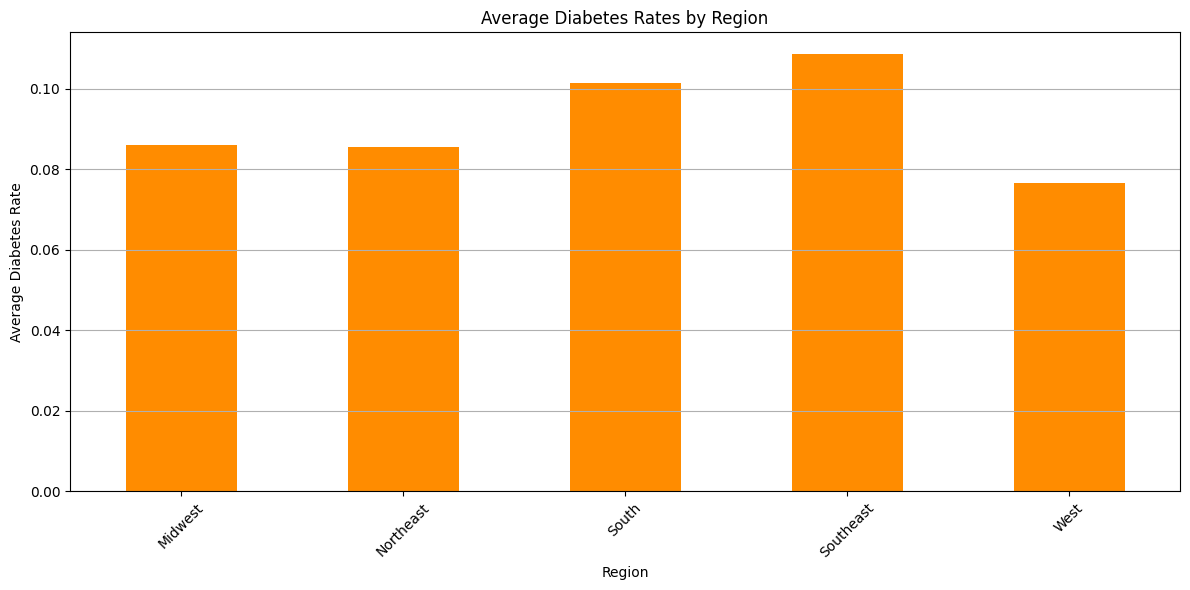

In [30]:
# 
# EDA #2 and interpretations in this section 
# Bar plot showing average diabetes rate by region
# Calculate the average diabetes rate by region and sort by region order manually
# Define the desired region order
region_order = ['Midwest', 'Northeast', 'South', 'Southeast', 'West']

# Group and reorder the average diabetes rates
avg_diabetes_by_region = diabetes.groupby('Region')['Diabetes_Number'].mean().loc[region_order]

# Plot the bar plot for average diabetes rates in the defined region order
plt.figure(figsize=(12, 6))
avg_diabetes_by_region.plot(kind='bar', color='darkorange')
plt.title('Average Diabetes Rates by Region')
plt.xlabel('Region')
plt.ylabel('Average Diabetes Rate')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

The average Diabetes rate is the highest in Southeast Region whereas it is the lowest in West region.

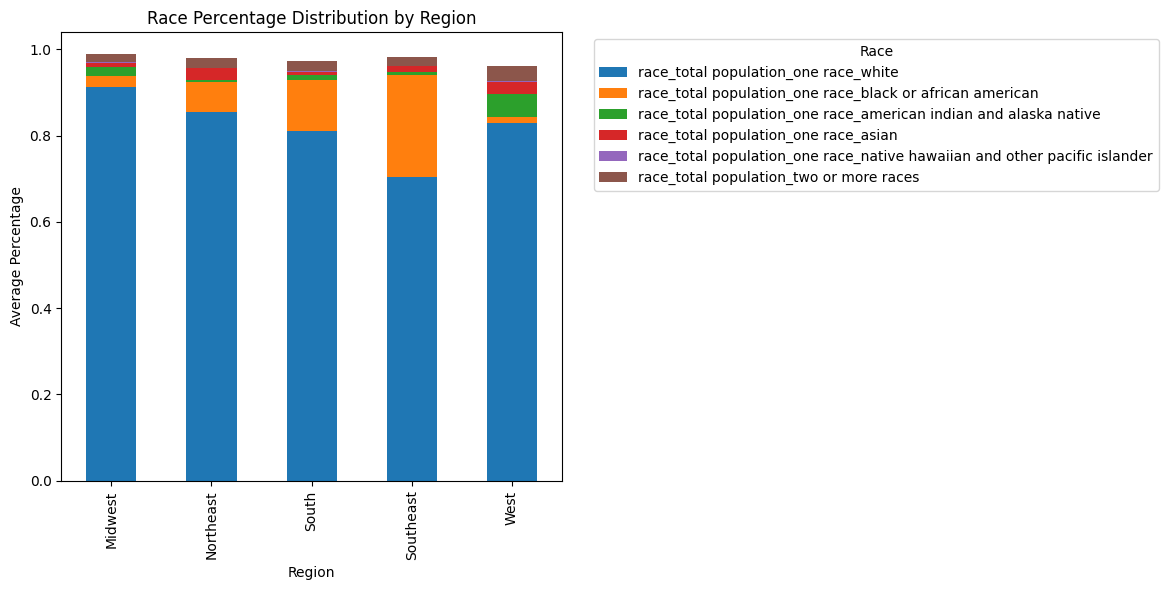

In [31]:
# List of actual race columns
race_columns = [
    'race_total population_one race_white', 
    'race_total population_one race_black or african american',
    'race_total population_one race_american indian and alaska native',
    'race_total population_one race_asian',
    'race_total population_one race_native hawaiian and other pacific islander',
    'race_total population_two or more races'
]

# Group by region and calculate the mean of each race percentage
race_distribution_by_region = diabetes.groupby('Region')[race_columns].mean().loc[region_order]

# Plot the stacked bar chart for race distribution, ensuring same region order
race_distribution_by_region.plot(kind='bar', stacked=True, figsize=(12, 6))

# Add title and labels
plt.title('Race Percentage Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Average Percentage')

# Adjust the legend to be outside the plot
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Midwest has the highest average percentage of one race which is white. Southeast region has the highest average percentage of one race which is black or African-American. West has the highest average percentage of American Indian and Alaska native. The highest average percentage of Asian population is the highest in West.

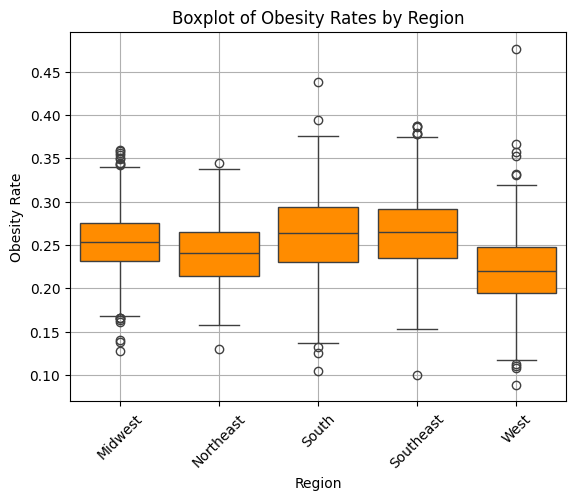

In [32]:
# EDA #3 and interpretations in this section 
# Boxplot of Obesity rates by region to show distribution
sns.boxplot(x='Region', y='Obesity_Number', data=diabetes, order=region_order, boxprops=dict(facecolor='darkorange'))

# Add titles and labels
plt.title('Boxplot of Obesity Rates by Region')
plt.xlabel('Region')
plt.ylabel('Obesity Rate')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for easier interpretation
plt.grid(True)

# Display the plot
plt.show()

The median obesity rate is 25% in all the regions. The obesity rate changes from 0.10 to 0.45 across all regions.

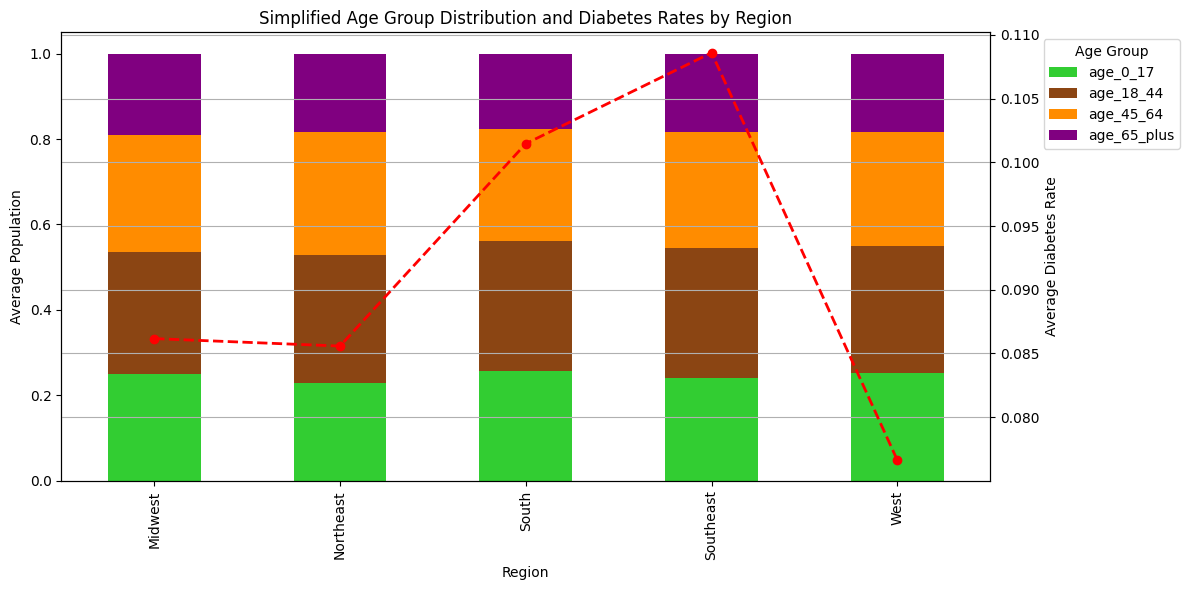

In [54]:
#
# EDA #4 and interpretations in this section 

# Define the new age groups by summing the relevant columns
diabetes['age_0_17'] = diabetes[
    ['sex and age_total population_under 5 years', 
     'sex and age_total population_5 to 9 years', 
     'sex and age_total population_10 to 14 years', 
     'sex and age_total population_15 to 19 years']
].sum(axis=1)

diabetes['age_18_44'] = diabetes[
    ['sex and age_total population_20 to 24 years', 
     'sex and age_total population_25 to 34 years', 
     'sex and age_total population_35 to 44 years']
].sum(axis=1)

diabetes['age_45_64'] = diabetes[
    ['sex and age_total population_45 to 54 years', 
     'sex and age_total population_55 to 59 years', 
     'sex and age_total population_60 to 64 years']
].sum(axis=1)

diabetes['age_65_plus'] = diabetes[
    ['sex and age_total population_65 to 74 years', 
     'sex and age_total population_75 to 84 years', 
     'sex and age_total population_85 years and over']
].sum(axis=1)

# List of new age group columns
age_group_columns = ['age_0_17', 'age_18_44', 'age_45_64', 'age_65_plus']

# Group by region and calculate the mean of each new age group
age_distribution_by_region = diabetes.groupby('Region')[age_group_columns].mean()

# Group by region and calculate the mean diabetes rate
diabetes_by_region = diabetes.groupby('Region')['Diabetes_Number'].mean()

# Combine the diabetes rate with age distribution by region
fig, ax = plt.subplots(figsize=(12, 6))

# Define a custom color palette 
custom_palette = ['#32CD32', '#8B4513', '#FF8C00', '#800080']  # green, brown, orange, purple

# Plot the age group distribution as a stacked bar chart with custom colors
age_distribution_by_region.plot(kind='bar', stacked=True, ax=ax, color=custom_palette)
ax.set_ylabel('Average Population')

# Overlay the diabetes rate as a line plot on a secondary y-axis
ax2 = ax.twinx()
diabetes_by_region.plot(ax=ax2, color='red', linestyle='--', marker='o', linewidth=2)
ax2.set_ylabel('Average Diabetes Rate')

# Add title and improve layout
plt.title('Simplified Age Group Distribution and Diabetes Rates by Region')
plt.xticks(rotation=45)
plt.grid(True)

# Move the legend outside the plot to avoid overlap
ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to ensure everything fits
plt.tight_layout()
plt.show()

Each region has a similar distribution across the age groups. Age groups 18-44 and 45-64 makes the largest portion of the population with diabetes. Age group 65+ have the smallest portion of population with diabetes.

The diabetes rate is highest in the Southeast region is around 0.108 on the other hand in the West region at approximately 0.020.

Regions with a larger proportion of older age groups (45+) exampleSoutheast, shows higher diabetes rates. This means older populations tend to have a higher prevalence of diabetes.

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [34]:
#
# Drop and get dummies
#-----------

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes, 
                               columns = ['Region'],  
                               drop_first = True)  # drop the first dummy column to avoid multicollinearity

# Drop 'County' and 'State' columns since we have 'CountyFIPS' as the unique identifier
diabetes_clean = diabetes_clean.drop(labels=['County', 'State'], axis=1)

# Display the first 10 rows of the new cleaned dataset
diabetes_clean.head(10)

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

In [35]:
print('shape: ', diabetes_clean.shape) 

shape:  (3112, 95)


In [36]:
for col in diabetes_clean.columns:
    print(col)

CountyFIPS
Diabetes_Number
Obesity_Number
Physical_Inactivity_Number
sex and age_total population_65 years and over_sex ratio (males per 100 females)
race_total population
race_total population_one race
race_total population_two or more races
race_total population_one race_white
race_total population_one race_black or african american
race_total population_one race_american indian and alaska native
race_total population_one race_american indian and alaska native_cherokee tribal grouping
race_total population_one race_american indian and alaska native_chippewa tribal grouping
race_total population_one race_american indian and alaska native_navajo tribal grouping
race_total population_one race_american indian and alaska native_sioux tribal grouping
race_total population_one race_asian
race_total population_one race_asian_asian indian
race_total population_one race_asian_chinese
race_total population_one race_asian_filipino
race_total population_one race_asian_japanese
race_total populati

In [37]:
# List of columns to drop to prevent multicollinearity
columns_to_drop = [
    'race_total population_two or more races',
    'sex and age_total population_65 years and over_sex ratio (males per 100 females)',
    'race_total population_one race',
    'race_total population_one race_american indian and alaska native_cherokee tribal grouping',
    'race_total population_one race_american indian and alaska native_chippewa tribal grouping',
    'race_total population_one race_american indian and alaska native_navajo tribal grouping',
    'race_total population_one race_american indian and alaska native_sioux tribal grouping',
    'race_total population_one race_asian_asian indian',
    'race_total population_one race_asian_chinese',
    'race_total population_one race_asian_filipino',
    'race_total population_one race_asian_japanese',
    'race_total population_one race_asian_korean',
    'race_total population_one race_asian_vietnamese',
    'race_total population_one race_asian_other asian',
    'race_total population_one race_native hawaiian and other pacific islander_native hawaiian',
    'race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro',
    'race_total population_one race_native hawaiian and other pacific islander_samoan',
    'race_total population_one race_native hawaiian and other pacific islander_other pacific islander',
    'race_total population_one race_some other race',
    'race_total population_two or more races_white and black or african american',
    'race_total population_two or more races_white and american indian and alaska native',
    'race_total population_two or more races_white and asian',
    'race_total population_two or more races_black or african american and american indian and alaska native',
    'race alone or in combination with one or more other races_total population',
    'race alone or in combination with one or more other races_total population_white',
    'race alone or in combination with one or more other races_total population_black or african american',
    'race alone or in combination with one or more other races_total population_american indian and alaska native',
    'race alone or in combination with one or more other races_total population_asian',
    'race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander',
    'race alone or in combination with one or more other races_total population_some other race',
    'hispanic or latino and race_total population_hispanic or latino (of any race)_mexican',
    'hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican',
    'hispanic or latino and race_total population_hispanic or latino (of any race)_cuban',
    'hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino',
    'hispanic or latino and race_total population_not hispanic or latino',
    'hispanic or latino and race_total population_not hispanic or latino_white alone',
    'hispanic or latino and race_total population_not hispanic or latino_black or african american alone',
    'hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone',
    'hispanic or latino and race_total population_not hispanic or latino_asian alone',
    'hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone',
    'hispanic or latino and race_total population_not hispanic or latino_some other race alone',
    'hispanic or latino and race_total population_not hispanic or latino_two or more races',
    'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race',
    'hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -  and three or more races',
    'citizen -  voting age population_citizen -  18 and over population',
    'citizen -  voting age population_citizen -  18 and over population_male',
    'citizen -  voting age population_citizen -  18 and over population_female',
    'sex and age_total population_sex ratio (males per 100 females)',
    'sex and age_total population_median age (years)',
    'sex and age_total population_under 18 years',
    'sex and age_total population_16 years and over',
    'sex and age_total population_18 years and over',
    'sex and age_total population_21 years and over',
    'sex and age_total population_62 years and over',
    'sex and age_total population_65 years and over',
    'sex and age_total population_18 years and over_male',
    'sex and age_total population_18 years and over_female',
    'sex and age_total population_18 years and over_sex ratio (males per 100 females)',
    'sex and age_total population_65 years and over_male',
    'sex and age_total population_65 years and over_female',
    'sex and age_total population_under 5 years',
    'sex and age_total population_5 to 9 years',
    'sex and age_total population_10 to 14 years',
    'sex and age_total population_15 to 19 years',
    'sex and age_total population_20 to 24 years',
    'sex and age_total population_25 to 34 years',
    'sex and age_total population_35 to 44 years',
    'sex and age_total population_45 to 54 years',
    'sex and age_total population_55 to 59 years',
    'sex and age_total population_60 to 64 years',
    'sex and age_total population_65 to 74 years',
    'sex and age_total population_75 to 84 years',
    'sex and age_total population_85 years and over'
]

# Drop the specified columns from the dataset
diabetes_clean = diabetes_clean.drop(columns=columns_to_drop)

# Check the first 10 rows to verify the cleaning
diabetes_clean.head(10)

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,race_total population,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_asian,race_total population_one race_native hawaiian and other pacific islander,hispanic or latino and race_total population_hispanic or latino (of any race),total housing units,sex and age_total population_male,sex and age_total population_female,age_0_17,age_18_44,age_45_64,age_65_plus,Region_Northeast,Region_South,Region_Southeast,Region_West
0,01001,0.093804,0.244366,0.226902,55200,0.768786,0.191395,0.002880,0.010290,0.000580,0.027681,0.422373,0.486848,0.513152,0.266250,0.322011,0.265906,0.145833,False,False,True,False
1,01003,0.080281,0.233255,0.192324,208107,0.862662,0.094970,0.007314,0.008073,0.000043,0.044943,0.537920,0.486231,0.513769,0.241837,0.285877,0.276882,0.195404,False,False,True,False
2,01005,0.131875,0.310643,0.210651,25782,0.473819,0.475758,0.002793,0.003724,0.000039,0.042898,0.462997,0.531262,0.468738,0.230820,0.327244,0.262198,0.179738,False,False,True,False
3,01007,0.105251,0.290052,0.258667,22527,0.766547,0.222755,0.000355,0.001642,0.000000,0.024282,0.406668,0.539442,0.460558,0.233320,0.331203,0.272961,0.162516,False,False,True,False
4,01009,0.108977,0.246804,0.249198,57645,0.955052,0.014954,0.002446,0.003435,0.000312,0.091266,0.420193,0.493260,0.506740,0.257247,0.297129,0.268107,0.177518,False,False,True,False
5,01011,0.224208,0.353748,0.321967,10352,0.219861,0.762461,0.011785,0.005410,0.000000,0.004927,0.437210,0.547044,0.452956,0.245556,0.330854,0.267485,0.156105,False,False,True,False
6,01013,0.145318,0.349513,0.300974,20025,0.520050,0.452185,0.000100,0.011536,0.000000,0.003346,0.500674,0.467815,0.532185,0.252884,0.294532,0.262522,0.190062,False,False,True,False
7,01015,0.127648,0.298580,0.234140,115098,0.743349,0.205703,0.003067,0.009253,0.000078,0.036517,0.466403,0.480590,0.519410,0.246199,0.317017,0.268354,0.168430,False,False,True,False
8,01017,0.141518,0.324425,0.220570,33826,0.575977,0.393750,0.002868,0.011973,0.000000,0.022704,0.502010,0.480607,0.519393,0.228729,0.301218,0.280583,0.189470,False,False,True,False
9,01019,0.122848,0.300429,0.237342,25853,0.928209,0.049008,0.009129,0.002127,0.000000,0.015395,0.639423,0.495881,0.504119,0.224229,0.264147,0.294202,0.217422,False,False,True,False


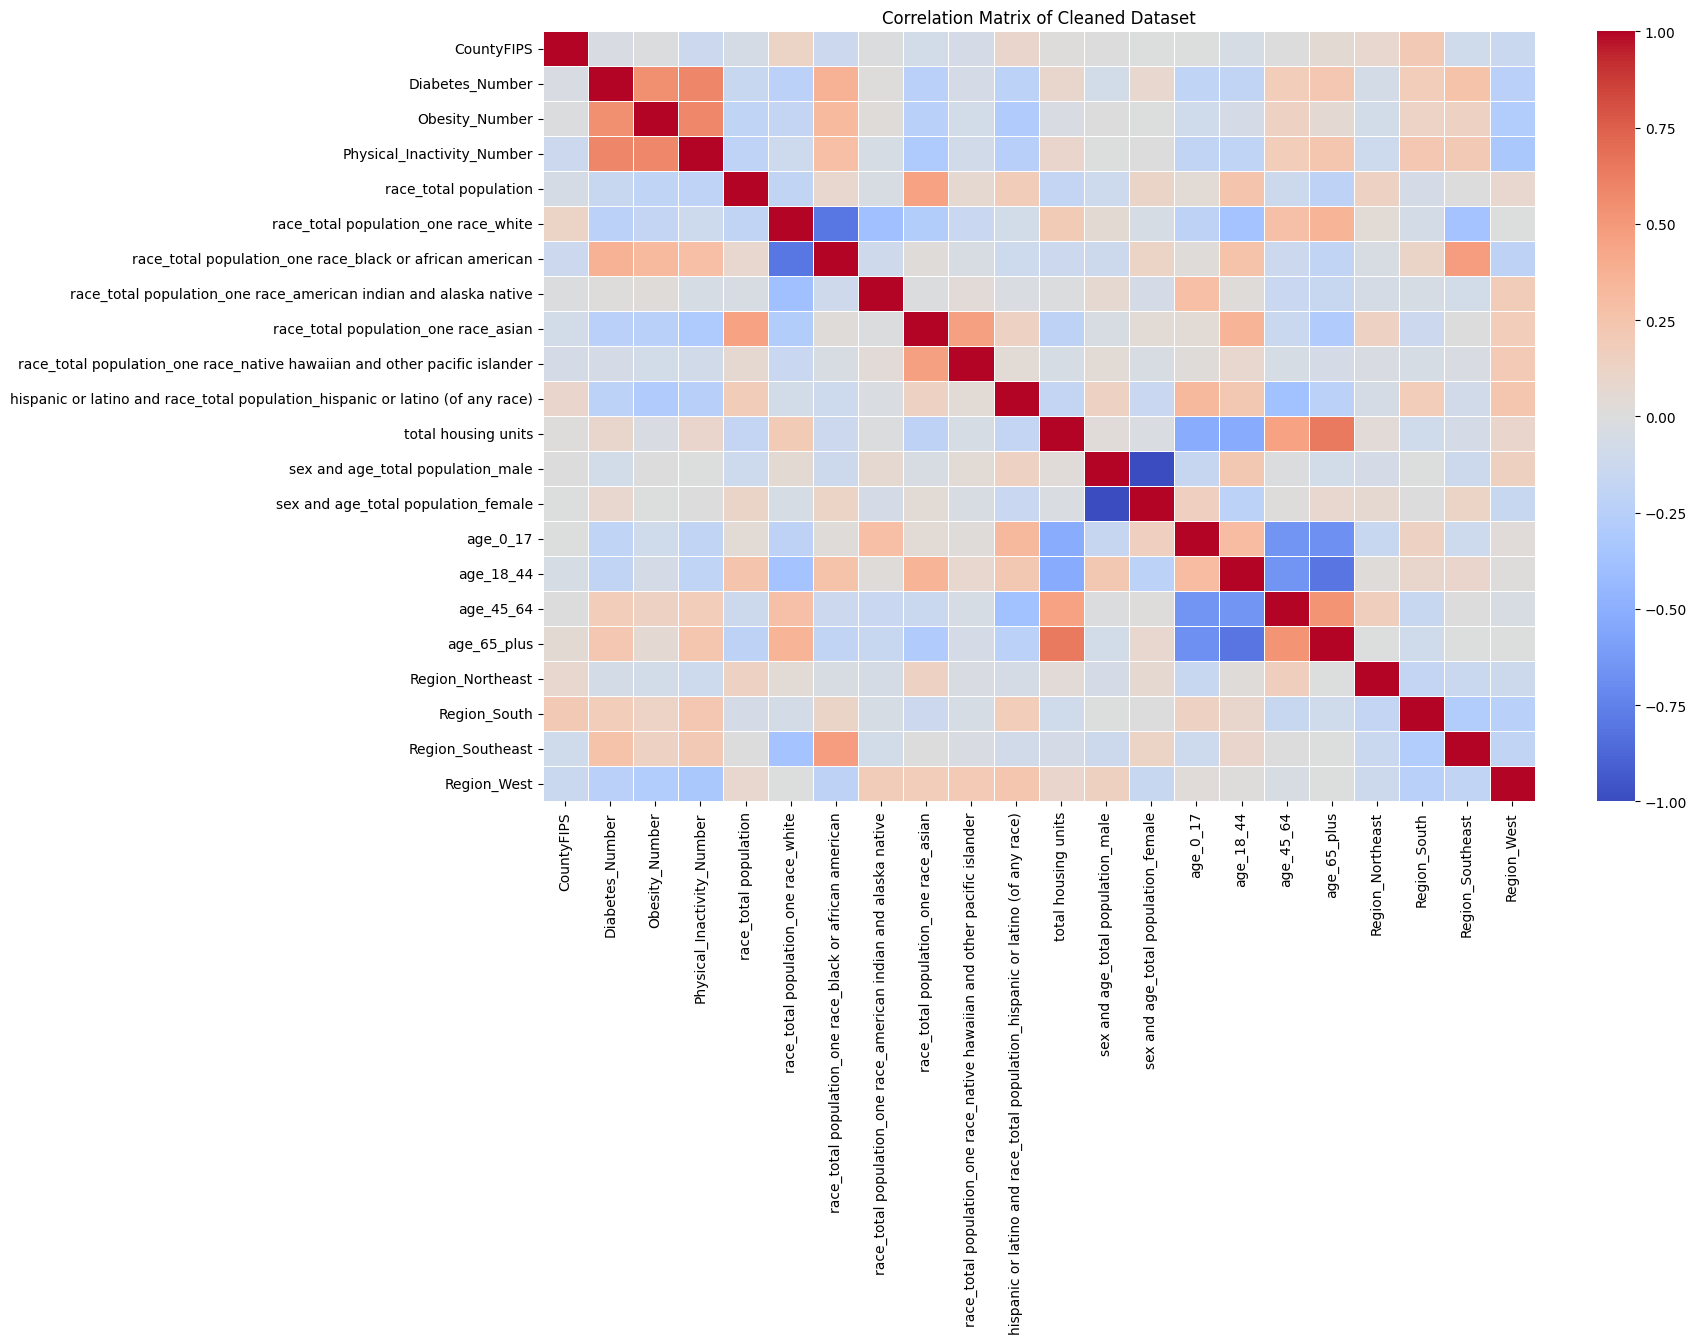

In [38]:
# Generate a correlation matrix for the cleaned dataset
correlation_matrix = diabetes_clean.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Cleaned Dataset')
plt.show()

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [39]:
#
# Partition data
#-----------
# import necessary libraries
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed
np.random.seed(10)

# Create the y dataframe (target variable)
y = diabetes_clean['Diabetes_Number']

# Create the X dataframe (features)
# Drop 'Diabetes_Number' and any irrelevant columns (if you have 'race alone or in combination with one or more other races_total population' in the dataset)
X = diabetes_clean.drop(columns=['Diabetes_Number'])

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

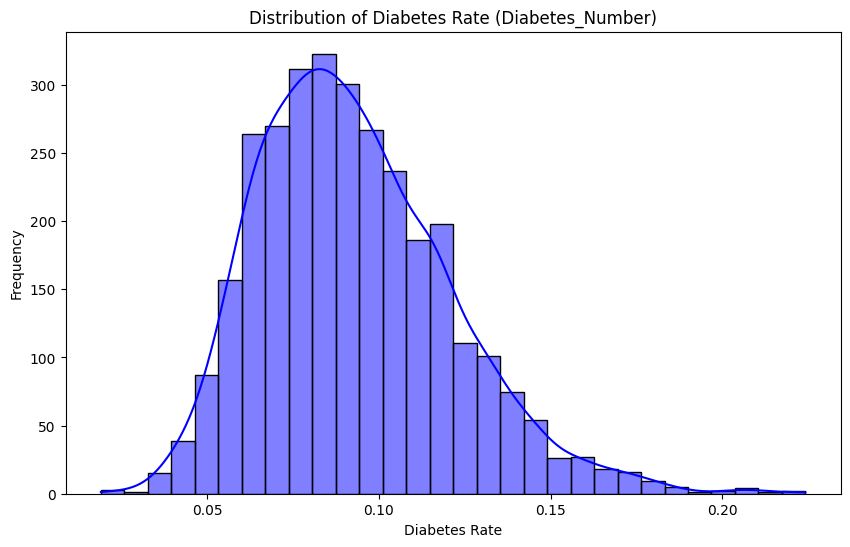

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable (Diabetes_Number)
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True, color='blue')
plt.title('Distribution of Diabetes Rate (Diabetes_Number)')
plt.xlabel('Diabetes Rate')
plt.ylabel('Frequency')
plt.show()

In [41]:
# Create bins based on observed distribution
y_binned = pd.cut(y, bins=[-np.inf, 0.07, 0.12, np.inf], labels=['low', 'medium', 'high'])

# Verify the binning distribution
print(y_binned.value_counts())

Diabetes_Number
medium    1934
low        686
high       492
Name: count, dtype: int64


In [42]:
from sklearn.model_selection import train_test_split

# Perform stratified split based on the diabetes rate bins # Step 1: Split the data into 80% training/validation and 20% test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, 
                                                            train_size=0.8, 
                                                            test_size=0.2, 
                                                            stratify=y_binned, 
                                                            random_state=42)

# Further split the training/validation set into training and validation # Step 2: Split the 80% training/validation set into 60% training and 20% validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, 
                                                  train_size=0.75, 
                                                  test_size=0.25, 
                                                  stratify=y_binned.loc[y_train_val.index], 
                                                  random_state=42)

In [43]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_val[column] = scaler.transform(X_val[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.transform(X_test[column].values.reshape(-1, 1)).flatten()

## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very high penalty (very low, like alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** ...

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1:  (Linear Regression) 

In [44]:
#
# Model 1 training
#-----------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lin_reg = LinearRegression()

# Train the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = lin_reg.predict(X_train)

# Evaluate performance on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Linear Regression - Training MSE: {mse_train}')
print(f'Linear Regression - Training R^2: {r2_train}')

Linear Regression - Training MSE: 0.00040386895846657574
Linear Regression - Training R^2: 0.49049112549610974


#### Model 2:  (Ridge Regression) 

In [45]:
#
# Model 2 training
#-----------
from sklearn.linear_model import Ridge

# Initialize Ridge regression model with alpha (penalty) of choice
ridge_reg = Ridge(alpha=1.0)  # You can tune this hyperparameter via cross-validation

# Train the model
ridge_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_ridge = ridge_reg.predict(X_train)

# Evaluate performance on the training set
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

print(f'Ridge Regression - Training MSE: {mse_train_ridge}')
print(f'Ridge Regression - Training R^2: {r2_train_ridge}')

Ridge Regression - Training MSE: 0.00040387089599596695
Ridge Regression - Training R^2: 0.49048868116757516


#### Model 3:  (Lasso Regression) 

In [46]:
#
# Model 3 training
#-----------
from sklearn.linear_model import Lasso

# Initialize Lasso regression model with a low alpha value (strong regularization)
lasso_reg = Lasso(alpha=0.001)  # Tune alpha as necessary

# Train the model
lasso_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_lasso = lasso_reg.predict(X_train)

# Evaluate performance on the training set
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)

print(f'Lasso Regression - Training MSE: {mse_train_lasso}')
print(f'Lasso Regression - Training R^2: {r2_train_lasso}')

Lasso Regression - Training MSE: 0.00042483198944028244
Lasso Regression - Training R^2: 0.4640447990486478


#### Model 4:  (Random Forest Regressor) 

In [47]:
#
# Model 4 training
#-----------
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest with 100 trees (this can be tuned)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_rf = rf_reg.predict(X_train)

# Evaluate performance on the training set
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print(f'Random Forest - Training MSE: {mse_train_rf}')
print(f'Random Forest - Training R^2: {r2_train_rf}')

Random Forest - Training MSE: 5.94806029816605e-05
Random Forest - Training R^2: 0.9249610685726749


#### Model 5:  (Elastic Net Model) 

In [48]:
#
# Model 5 training
#-----------
from sklearn.linear_model import ElasticNet

# Initialize ElasticNet model with chosen alpha and l1_ratio (which controls the mix between Lasso and Ridge penalties)
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42)  # l1_ratio=0.5 gives equal weight to Lasso and Ridge

# Train the model
elastic_net.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_enet = elastic_net.predict(X_train)

# Evaluate performance on the training set
mse_train_enet = mean_squared_error(y_train, y_train_pred_enet)
r2_train_enet = r2_score(y_train, y_train_pred_enet)

print(f'Elastic Net - Training MSE: {mse_train_enet}')
print(f'Elastic Net - Training R^2: {r2_train_enet}')

Elastic Net - Training MSE: 0.00041452254145467256
Elastic Net - Training R^2: 0.477050887112084



Ridge regression and Linear regression have same Mean Squared Error and R-squared. 
In linear regression 
MSE shows a low average error per prediction. An R² of 49% indicates that the model accounts for approximately 49% of the variability in the target variable.

Ridge Regression - The low MSE indicates that the model's predictions are very similar to the actual values, with a small average error for each prediction.  An R² of 49% indicates that the model accounts for approximately 49% of the variability in the target variable.


Lasso regression has lower r-squared in comparison with both Linear and Ridge regression.  Higher MSE compared to other models shows that Lasso Regression’s predictions are close to the actual values so they are better.

Random Forest has very high r-squared. Low MSE indicates that the model’s predictions are close to the actual values showing strong accuracy of training data.


Elastic Net is slightly better than Lasso but not than Linear or Ridge regression. MSE tells a low average error in predictions. This means the estimates are close to the actual values.

## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [60]:
#
# Predict on validation data
#-----------

# Initialize models with the original parameters for simplicity
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.001),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Elastic Net": ElasticNet(alpha=0.001, l1_ratio=0.5, random_state=42)
}

# Dictionary to store results
results = {}

# Train each model on the training data and evaluate on validation data
for name, model in models.items():
    # Train on the training data
    model.fit(X_val, y_val)
    
    # Predict on the validation data
    y_val_pred = model.predict(X_val)
    
    # Calculate MSE and R-squared for the validation data
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    
    # Store results
    results[name] = {"Validation MSE": mse_val, "Validation R^2": r2_val}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name} - Validation MSE: {metrics['Validation MSE']}, R^2: {metrics['Validation R^2']}")

C:\Users\chopr\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.05203e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Linear Regression - Validation MSE: 0.00035430189075694814, R^2: 0.5240183500385649
Ridge Regression - Validation MSE: 0.0003544183117608849, R^2: 0.5238619459577807
Lasso Regression - Validation MSE: 0.0003828682128176421, R^2: 0.4856413459567367
Random Forest - Validation MSE: 5.7424779603370654e-05, R^2: 0.9228535267314316
Elastic Net - Validation MSE: 0.0003677994414115456, R^2: 0.5058852646709211


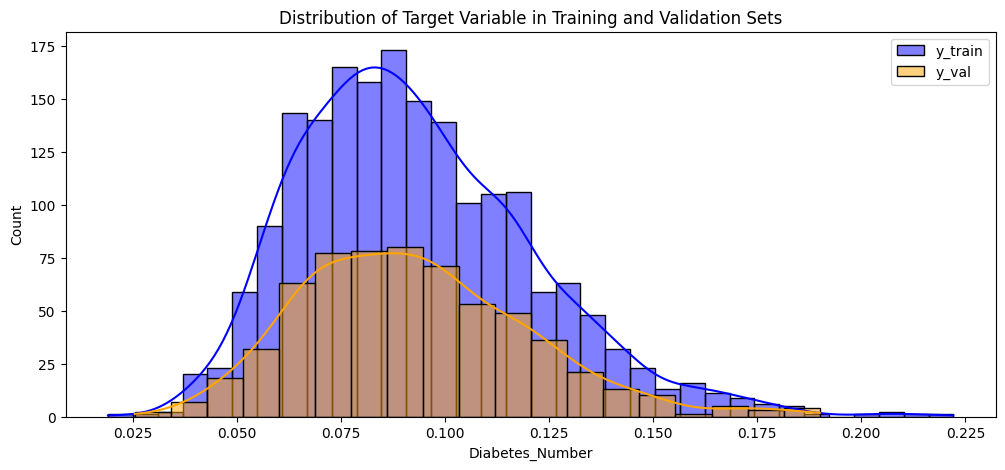

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.histplot(y_train, kde=True, color="blue", label="y_train")
sns.histplot(y_val, kde=True, color="orange", label="y_val")
plt.title("Distribution of Target Variable in Training and Validation Sets")
plt.legend()
plt.show()

In [51]:
from sklearn.preprocessing import StandardScaler

# Reinitialize scaler
scaler = StandardScaler()

# Fit on X_train only
X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

for column in columns:
    X_train_scaled[column] = scaler.fit_transform(X_train[[column]])
    X_val_scaled[column] = scaler.transform(X_val[[column]])
    X_test_scaled[column] = scaler.transform(X_test[[column]])

In [52]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and fit the Gradient Boosting model
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train_scaled, y_train)

# Predict and evaluate on the validation set
y_val_pred_gb = gb_reg.predict(X_val_scaled)
mse_val_gb = mean_squared_error(y_val, y_val_pred_gb)
r2_val_gb = r2_score(y_val, y_val_pred_gb)

print(f'Gradient Boosting - Validation MSE: {mse_val_gb}, R^2: {r2_val_gb}')

Gradient Boosting - Validation MSE: 0.0011529081143305012, R^2: -0.5488574033306852


### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

In [61]:
#
# Predict using your best model
#-----------
# Filter out only numeric features to avoid boolean columns in the model
X_train_val_numeric = X_train_val.select_dtypes(include=[np.number])
X_test_numeric = X_test.select_dtypes(include=[np.number])

# Step 1: Train the Ridge model on the full training/validation set with numeric features
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_val_numeric, y_train_val)
ridge_intercept = ridge_model.intercept_
ridge_coefficients = np.concatenate(([ridge_intercept], ridge_model.coef_))

# Step 2: Prepare test data with a constant and run OLS for statistical approximations
X_test_with_const = sm.add_constant(X_test_numeric)
ols_model = sm.OLS(y_test, X_test_with_const).fit()
ols_summary = ols_model.summary2().tables[1]

# Ensure alignment of predictors
predictors = ["Intercept"] + list(X_test_numeric.columns)
ols_summary.index = predictors  # Align indices

# Step 3: Calculate overall metrics on the test set
mse_test = mean_squared_error(y_test, ridge_model.predict(X_test_numeric))
r2_test = r2_score(y_test, ridge_model.predict(X_test_numeric))
overall_p_value = ols_model.f_pvalue


# Step 4: Construct the DataFrame for results
results_table = pd.DataFrame({
    "Predictor": predictors,
    "Estimate": ridge_coefficients,
    "SE": ols_summary["Std.Err."],
    "Z": ols_summary["t"],
    "p": ols_summary["P>|t|"],
    "Odds Ratio": np.exp(ridge_coefficients)
})

# Step 5: Append MSE, R², and overall p-value at the end of the table
metrics_table = pd.DataFrame({
    "Predictor": ["MSE", "R²", "Overall p-value"],
    "Estimate": [mse_test, r2_test, overall_p_value],
    "SE": [np.nan, np.nan, np.nan],
    "Z": [np.nan, np.nan, np.nan],
    "p": [np.nan, np.nan, np.nan],
    "Odds Ratio": [np.nan, np.nan, np.nan]
})

# Combine results table with metrics
final_results_table = pd.concat([results_table, metrics_table], ignore_index=True)

# Display the results in the desired format
print("Ridge Regression Test Results (Approximate):")
print(final_results_table.to_string(index=False))


Ridge Regression Test Results (Approximate):
                                                                    Predictor      Estimate           SE         Z            p  Odds Ratio
                                                                    Intercept  3.005262e-02 3.251926e-04  3.275647 1.114151e-03    1.030509
                                                               Obesity_Number  1.509586e-01 1.096387e-03  6.562365 1.134993e-10    1.162948
                                                   Physical_Inactivity_Number  1.700298e-01 1.119472e-03  8.923720 5.283941e-18    1.185340
                                                        race_total population -3.865872e-09 9.137386e-11  0.228462 8.193637e-01    1.000000
                                         race_total population_one race_white -4.243459e-03 1.249313e-03 -1.242678 2.144654e-01    0.995766
                     race_total population_one race_black or african american  4.279511e-02 1.270165e-03  0.938611 

### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [63]:
#
# Run cross-validation
#-----------
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)


kf = KFold(n_splits=5, shuffle=True, random_state=42)


mse_scores = cross_val_score(ridge_model, X_train_val_numeric, y_train_val, cv=kf, scoring=mse_scorer)
r2_scores = cross_val_score(ridge_model, X_train_val_numeric, y_train_val, cv=kf, scoring='r2')

# Output results
print("Cross-Validation Results for Ridge Regression:")
print(f"Mean MSE: {-mse_scores.mean():.4f}, Std MSE: {mse_scores.std():.4f}")
print(f"Mean R²: {r2_scores.mean():.4f}, Std R²: {r2_scores.std():.4f}")



Cross-Validation Results for Ridge Regression:
Mean MSE: 0.0004, Std MSE: 0.0000
Mean R²: 0.4569, Std R²: 0.0276


The low Mean Squared Error (MSE) suggests that, on average, the model’s predictions are close to the true values, indicating good predictive accuracy. Standard Deviation: The minimal standard deviation shows that MSE values are highly consistent across the 5 folds, highlighting stable model performance across various data subsets.


The R² score of around 0.457 means that the model explains approximately 45.69% of the variance in the target variable. The low standard deviation of R² across the folds (0.0276) indicates that the model performs consistently across different data subsets.

There can be less stability in the performance estimates because of the size of the folds.

There is 45.69% variability in the output data.




## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

Bias-variance tradeoff is related to the generalization error and understanading the flexibility of model to make good predictions. Bias comes from the expected difference between our developed model and the true observations. Variance comes from the change in our developed model if change the training data. For example, a model with more flexibility, i.e., fitting well to one set of training data but parameters are updated completely for new training then the model have a very high variance which will result in high generalization error resulting from overfitting of model on the present training data. On the other hand if we use a very simple model the model might have very variance but high bias, again resulting in high generalization erorr from underfitting on the current training data. Thus, we want to select a model with in between low and high bias and low and high variance so that the model has overall low generlization error and not result in underfitting or overfitting.

2. Define overfitting, and why it matters for machine learning. How can we address it?

When a model could not generalize well on the unobserved dataset, i.e., high generalization error, but fits well to training set then it is called overfitting. This means the model does not make accurate predictions on test data. There are different reasons of overfitiing - model being very complex, low bias and high variance or training data's size. It is important because overfitting tells poor performance of model on unseen data. It gives negative impact on generalization.

We can reduce overfitting in the following ways:
- By improving the quality of the training data
- Increasing the amount of training data to improve in generalization
- Reducing the model's complexity
- Using regularization techniques, such as Ridge and Lasso regularization



3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

Across all the regions in United States, diabetes is highly correlated with obesity and inactivity. Diabetes rate is the highest in Southeast region and the lowest in Northeast region. Diabetes is also positive correlated and increases with increase African-American population while the lowest in the Asian, hispanic or latino. Diabetes is more prevalent in female than male. Diabetes rates increases with increasing ratio of population with age over 45. Age 0-44 have the lowest rate of diabetes and it is highest in 65+ population.

I will prioritize Southeast area for pilot program because it has the highest average diabetes rate. No, my answer would not change if I want to take certain features in account as the diabetes rate is prevalent in 65+ age in Southeast area. But if I take race in account than the diabetes rate increases in African-American population. Also, diabetes is more prevalent in female than male.

I would be planning to deploy the model where we target African-American who are in Southeast region but I am not sure if that way we are focusing on 65+ population or not and I am not sure which composition I should focus on.